In [8]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
import funct
from IPython.display import display
from xgboost import XGBClassifier, XGBRegressor

In [9]:
df = funct.data_set()
pd.options.display.max_columns = None
display(df)

,Date,HomeTeam,AwayTeam,FTHG,FTHG_MEAN,FTAG,FTR,FTR_A,Diff_POINTS,LAST_2_MP_H,LAST_2_MP_A,LAST_3_MP_H,LAST_3_MP_A,LAST_5_MP_H,LAST_5_MP_A,H_DRAWS,A_DRAWS,H_POINTS,A_POINTS,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,AvgHr,AvgDr,AvgAr,FTAG_MEAN,HTHG_MEAN,HTAG_MEAN,HS_MEAN,AS_MEAN,HST_MEAN,AST_MEAN,HC_MEAN,AC_MEAN,HF_MEAN,AF_MEAN,HY_MEAN,AY_MEAN,HR_MEAN,AR_MEAN,LAST_2_FTHG_MEAN,LAST_2_FTAG_MEAN,LAST_3_FTHG_MEAN,LAST_3_FTAG_MEAN,LAST_5_FTHG_MEAN,LAST_5_FTAG_MEAN,LAST_2_HS_MEAN,LAST_2_AS_MEAN,LAST_2_HC_MEAN,LAST_2_AC_MEAN,LAST_2_HF_MEAN,LAST_2_AF_MEAN,LAST_2_HY_MEAN,LAST_2_AY_MEAN,LAST_2_HR_MEAN,LAST_2_AR_MEAN,LAST_3_HS_MEAN,LAST_3_AS_MEAN,LAST_3_HC_MEAN,LAST_3_AC_MEAN,LAST_3_HF_MEAN,LAST_3_AF_MEAN,LAST_3_HY_MEAN,LAST_3_AY_MEAN,LAST_3_HR_MEAN,LAST_3_AR_MEAN,LAST_5_HS_MEAN,LAST_5_AS_MEAN,LAST_5_HC_MEAN,LAST_5_AC_MEAN,LAST_5_HF_MEAN,LAST_5_AF_MEAN,LAST_5_HY_MEAN,LAST_5_AY_MEAN,LAST_5_HR_MEAN,LAST_5_AR_MEAN,FTHG_ALL_MEAN,HTHG_ALL_MEAN,HS_ALL_MEAN,HST_ALL_MEAN,HC_ALL_MEAN,HF_ALL_MEAN,HY_ALL_MEAN,HR_ALL_MEAN,FTAG_ALL_MEAN,HTAG_ALL_MEAN,AS_ALL_MEAN,AST_ALL_MEAN,AC_ALL_MEAN,AF_ALL_MEAN,AY_ALL_MEAN,AR_ALL_MEAN
0,29/10/05,Birmingham,Everton,0.0,0.6000,1.0,0.0,2,-1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,18.0,11.0,8.0,6.0,8.0,6.0,11.0,15.0,0.0,1.0,0.0,0.0,2.180,3.130,3.100,0.2000,0.2000,0.0000,10.6000,5.2000,4.8000,2.6000,7.6000,3.0000,11.4000,15.2000,1.4000,1.600,0.2000,0.2000,1.0,0.0,0.666667,0.000000,0.6,0.2,6.0,6.5,7.0,5.0,13.5,9.5,2.0,1.0,0.5,0.0,10.000000,5.666667,9.000000,3.333333,12.000000,12.666667,1.333333,1.666667,0.333333,0.000000,10.6,5.2,7.6,3.0,11.4,15.2,1.4,1.6,0.2,0.2,0.700000,0.500000,7.600000,4.100000,6.200000,14.200000,1.600000,0.300000,0.222222,0.111111,7.222222,3.888889,5.333333,14.666667,1.888889,0.111111
1,29/10/05,Chelsea,Blackburn,4.0,2.8000,2.0,2.0,0,7.0,4.0,2.0,6.0,3.0,10.0,3.0,0.0,1.0,10.0,3.0,2.0,2.0,1.0,19.0,6.0,10.0,4.0,5.0,2.0,12.0,19.0,1.0,5.0,0.0,0.0,1.200,5.460,12.300,0.6000,0.6000,0.4000,12.8000,8.2000,6.8000,4.2000,6.0000,4.8000,11.8000,16.8000,1.2000,2.200,0.0000,0.4000,3.5,1.0,3.000000,0.666667,2.8,0.6,17.5,7.0,7.0,1.5,9.0,18.5,1.5,3.0,0.0,0.5,14.666667,7.000000,6.000000,2.333333,10.666667,18.000000,1.333333,2.666667,0.000000,0.333333,12.8,8.2,6.0,4.8,11.8,16.8,1.2,2.2,0.0,0.4,2.400000,0.600000,14.400000,7.800000,6.100000,11.900000,1.500000,0.000000,0.900000,0.300000,11.600000,6.300000,6.000000,17.600000,1.800000,0.300000
2,29/10/05,Middlesbrough,Man United,4.0,0.6000,1.0,2.0,0,-5.0,1.0,4.0,3.0,5.0,4.0,9.0,2.0,1.0,4.0,9.0,3.0,0.0,2.0,7.0,13.0,4.0,8.0,2.0,6.0,14.0,22.0,1.0,4.0,0.0,0.0,4.366,3.210,1.790,2.0000,0.2000,1.0000,10.8000,10.6000,6.2000,5.4000,6.2000,5.0000,15.4000,13.2000,2.4000,1.400,0.2000,0.0000,0.5,3.0,1.000000,2.000000,0.6,2.0,17.0,13.0,7.0,7.0,12.5,10.5,2.5,1.0,0.0,0.0,13.333333,10.000000,6.666667,5.333333,14.000000,12.000000,2.666667,1.333333,0.000000,0.000000,10.8,10.6,6.2,5.0,15.4,13.2,2.4,1.4,0.2,0.0,1.100000,0.500000,11.600000,5.900000,5.600000,13.700000,1.800000,0.100000,1.555556,0.777778,13.111111,6.444444,5.888889,13.222222,1.444444,0.000000
3,29/10/05,Sunderland,Portsmouth,1.0,1.0000,4.0,0.0,2,-1.0,1.0,1.0,2.0,3.0,2.0,3.0,2.0,1.0,2.0,3.0,1.0,0.0,2.0,5.0,5.0,2.0,5.0,11.0,2.0,11.0,9.0,0.0,1.0,0.0,0.0,2.240,3.120,2.990,0.8000,0.8000,0.0000,13.0000,8.8000,7.6000,4.0000,4.0000,3.6000,13.6000,13.2000,1.4000,2.200,0.0000,0.0000,1.0,0.5,1.000000,0.666667,1.0,0.8,13.5,7.5,4.5,3.0,12.0,9.0,2.0,2.5,0.0,0.0,12.666667,9.000000,3.333333,4.000000,14.333333,10.000000,1.333333,2.000000,0.000000,0.000000,13.0,8.8,4.0,3.6,13.6,13.2,1.4,2.2,0.0,0.0,0.900000,0.700000,9.200000,5.400000,3.800000,14.500000,1.700000,0.100000,0.700000,0.300000,11.400000,5.900000,5.500000,12.900000,1.900000,0.000000
4,29/10/05,Wigan,Fulham,1.0,1.0000,0.0,2.0,0,5.0,4.0,1.0,5.0,2.0,7.0,2.0,1.0,2.0,7.0,2.0,0.0,0.0,1.0,12.0,7.0,6.0,1.0,6.0,3.0,11.0,7.0,1.0,1.0,0.0,0.0,1.970,3.170,3.580,0.8000,0.4000,0.6000,12.4000,10.0000,5.8000,4.2000,3.2000,4.6000,12.4000,13.8000,1.2000,2.200,0.2000,0.0000,1.5,0.5,1.3

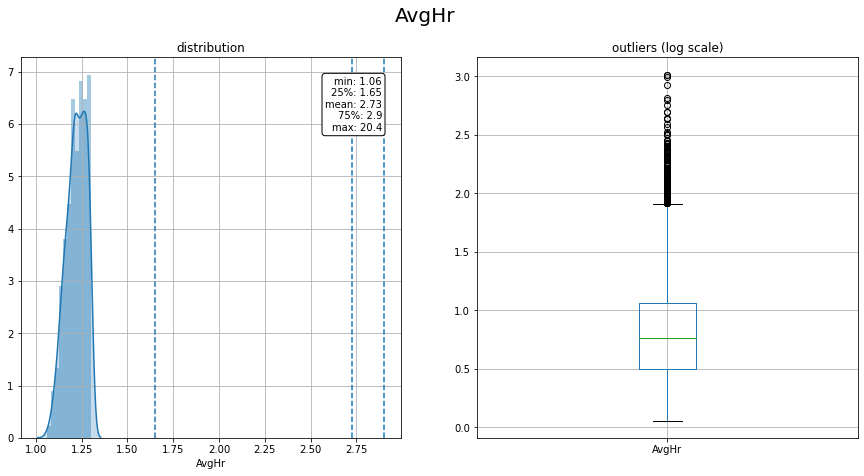

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=[15, 7])
fig.suptitle('AvgHr', fontsize=20)

### distribution
ax[0].title.set_text('distribution')
variable = df['AvgHr'].fillna(df['AvgHr'].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < breaks[1])]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df['AvgHr'].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df['AvgHr'])
tmp_dtf['AvgHr'] = np.log(tmp_dtf['AvgHr'])
tmp_dtf.boxplot(column='AvgHr', ax=ax[1])
plt.show()

In [11]:
features, target = funct.feature_and_target(tML='regression')
dtf_train, dtf_test = model_selection.train_test_split(df, test_size=0.3)

## scaler X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_train[features])
dtf_scaled= pd.DataFrame(X, columns=dtf_train[features].columns)

## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled['AvgHr'] = scalerY.fit_transform(dtf_train[target].values.reshape(-1,1))
dtf_scaled.head()

,LAST_2_HS_MEAN,LAST_2_AS_MEAN,LAST_2_HC_MEAN,LAST_2_AC_MEAN,LAST_2_HF_MEAN,LAST_2_AF_MEAN,LAST_2_HY_MEAN,LAST_2_AY_MEAN,LAST_2_HR_MEAN,LAST_2_AR_MEAN,LAST_3_HS_MEAN,LAST_3_AS_MEAN,LAST_3_HC_MEAN,LAST_3_AC_MEAN,LAST_3_HF_MEAN,LAST_3_AF_MEAN,LAST_3_HY_MEAN,LAST_3_AY_MEAN,LAST_3_HR_MEAN,LAST_3_AR_MEAN,LAST_5_HS_MEAN,LAST_5_AS_MEAN,LAST_5_HC_MEAN,LAST_5_AC_MEAN,LAST_5_HF_MEAN,LAST_5_AF_MEAN,LAST_5_HY_MEAN,LAST_5_AY_MEAN,LAST_5_HR_MEAN,LAST_5_AR_MEAN,FTHG_ALL_MEAN,HTHG_ALL_MEAN,HS_ALL_MEAN,HST_ALL_MEAN,HC_ALL_MEAN,HF_ALL_MEAN,HY_ALL_MEAN,HR_ALL_MEAN,FTAG_ALL_MEAN,HTAG_ALL_MEAN,AS_ALL_MEAN,AST_ALL_MEAN,AC_ALL_MEAN,AF_ALL_MEAN,AY_ALL_MEAN,AR_ALL_MEAN,FTHG_MEAN,FTAG_MEAN,HTHG_MEAN,HTAG_MEAN,HS_MEAN,AS_MEAN,HST_MEAN,AST_MEAN,HC_MEAN,AC_MEAN,HF_MEAN,AF_MEAN,HY_MEAN,AY_MEAN,HR_MEAN,AR_MEAN,H_POINTS,A_POINTS,H_DRAWS,A_DRAWS,Diff_POINTS,LAST_2_MP_H,LAST_2_MP_A,LAST_2_FTHG_MEAN,LAST_2_FTAG_MEAN,LAST_3_MP_H,LAST_3_MP_A,LAST_3_FTHG_MEAN,LAST_3_FTAG_MEAN,LAST_5_MP_H,LAST_5_MP_A,LAST_5_FTHG_MEAN,LAST_5_FTAG_MEAN,AvgHr
0,0.3,0.222222,-0.333333,-0.8,1.000000,-0.250,1.5,0.000000,0.0,0.0,0.466667,0.083333,-0.375,-0.833333,0.777778,-0.2,1.000000,-0.333333,0.000000,0.333333,0.409091,0.157895,-0.272727,-1.000000,0.923077,-0.785714,0.75,-0.75,0.0,1.0,-0.380952,-1.051638,0.214441,-0.695529,-0.585712,0.789635,1.361774,-0.826748,-0.955162,-0.666023,-0.295452,-0.867013,-1.325183,-0.646978,-1.473957,0.541270,-0.975000,-0.909091,-1.65,-0.611765,0.137080,-0.109705,-0.749802,-1.005478,-0.468625,-1.697324,0.469104,-0.886228,0.760918,-1.037791,-0.514706,1.160714,-0.888889,-1.000000,-1.0,-1.5,-0.125,-1.0,-2.0,-1.5,-0.5,-0.333333,0.000000,-0.666667,-0.333333,-0.75,-0.5,-1.0,-0.4,-0.229960
1,-0.6,0.222222,-0.500000,0.8,-0.285714,-0.375,0.5,-0.666667,0.0,0.5,-0.866667,0.250000,-1.000,0.500000,-0.444444,-0.8,0.666667,-0.666667,0.000000,0.333333,-0.863636,0.631579,-1.363636,0.111111,-0.153846,-0.500000,0.75,-1.00,0.0,1.0,-0.503401,0.088068,-1.112114,-1.198111,-1.744507,-0.800916,0.651706,-0.826748,1.141858,1.325438,0.784421,0.086918,0.215580,-0.482933,-1.310184,0.000000,-0.350000,1.022727,0.55,0.699160,-0.952945,0.689572,-0.952129,0.445576,-1.507329,0.315098,-0.463011,-0.301112,0.687281,-1.228405,-0.514706,0.464286,-1.111111,0.428571,-1.0,-0.5,-1.625,-2.0,1.0,-1.0,1.0,-1.000000,1.000000,-0.666667,0.666667,-0.75,1.0,-0.2,0.6,8.218623
2,1.2,-0.111111,0.666667,-0.8,-0.428571,-1.500,-0.5,-0.333333,0.0,0.0,1.866667,0.500000,1.000,-0.666667,-0.444444,-1.3,-0.333333,0.333333,0.000000,0.000000,1.272727,1.157895,1.090909,-0.666667,-0.307692,-1.071429,-0.50,0.50,0.0,0.0,-0.561404,-0.421800,0.291436,-0.615079,0.088991,-0.257670,0.329693,-0.217565,1.172617,1.208383,1.271994,0.004022,-0.136156,-1.170279,-0.629233,-0.836508,-1.266667,1.477273,-0.77,1.192157,0.807095,1.478981,-0.556467,-0.164160,1.069302,0.447603,-0.657963,-1.197605,-0.392732,-0.494186,0.485294,-0.464286,-0.666667,0.571429,0.0,-1.0,-1.250,1.0,2.0,-1.0,1.0,0.333333,0.666667,-0.333333,0.666667,0.00,0.5,-0.4,1.0,2.275304
3,0.3,1.666667,1.500000,0.8,-0.285714,-1.000,-1.5,-0.333333,0.0,0.0,0.066667,1.666667,1.375,1.000000,0.222222,-1.1,-1.000000,-0.666667,0.000000,0.000000,0.818182,0.894737,1.636364,1.222222,0.000000,-0.214286,0.00,-0.25,2.0,1.0,0.579048,0.863068,0.254403,0.885424,0.834143,0.372708,0.817064,1.488146,0.099650,-0.301406,0.701201,0.857411,0.381756,-0.400743,-0.423080,2.091270,0.150000,0.018939,0.11,-0.611765,0.127080,0.463197,0.720444,0.697679,1.101510,0.331661,0.121845,-0.491018,0.245457,-0.741279,1.735294,1.702381,0.444444,-0.428571,0.0,-0.5,0.875,2.0,-2.0,1.0,-1.0,0.666667,-0.666667,1.666667,-1.000000,0.50,-0.5,0.8,0.0,-0.605668
4,0.8,-0.222222,0.000000,0.0,0.000000,-0.625,-0.5,0.333333,0.0,0.0,0.400000,-0.083333,-0.125,-0.833333,0.666667,-1.1,0.000000,0.000000,0.333333,0.333333,0.681818,0.210526,-0.090909,-0.444444,0.461538,-1.071429,0.25,0.75,1.0,1.0,-0.380952,0.269709,0.187680,-0.524174,-0.751480,0.078964,-0.195755,0.620061,0.338287,0.058971,-0.092038,-0.376108,-0.026948,-0.827277,0.962166,-0.104563,

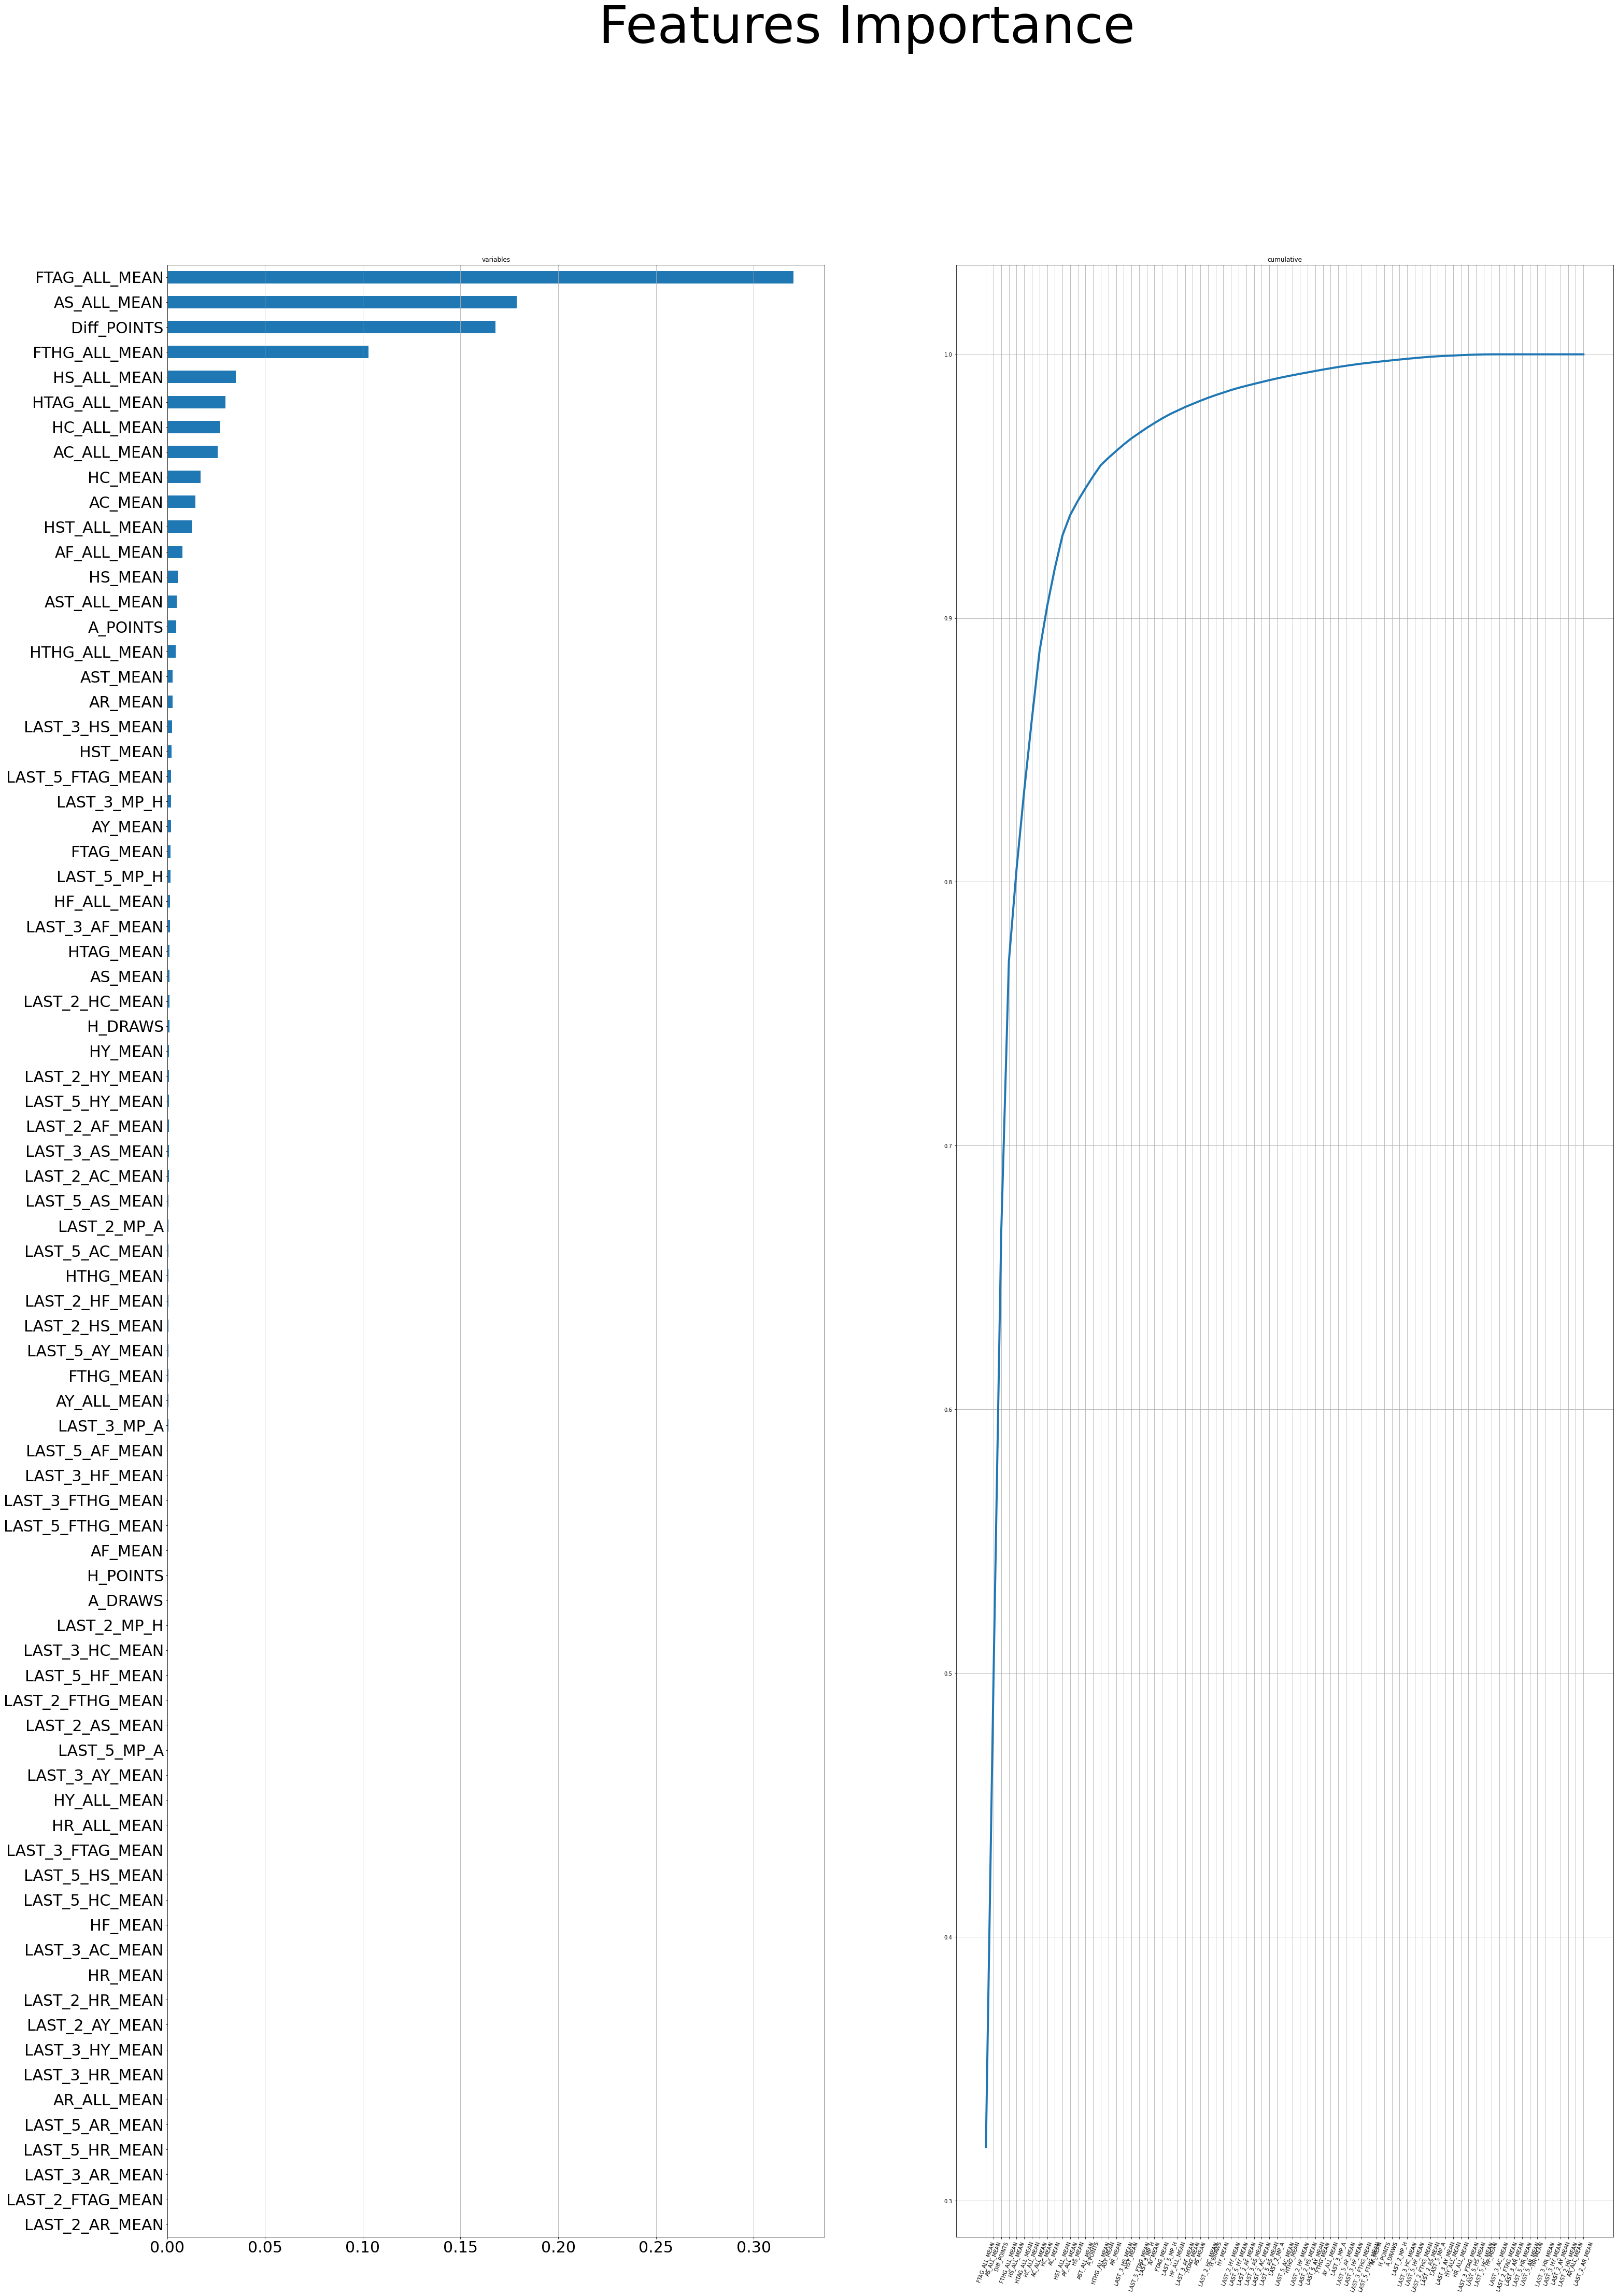

In [12]:
X = dtf_scaled.drop("AvgHr", axis=1).values
y = dtf_scaled["AvgHr"].values
feature_names = dtf_scaled.drop("AvgHr", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=[50,70])
fig.suptitle("Features Importance", fontsize=100)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0], fontsize=30).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [13]:
X_train = dtf_train[features].values
y_train = dtf_train["AvgHr"].values
X_test = dtf_test[features].values
y_test = dtf_test["AvgHr"].values

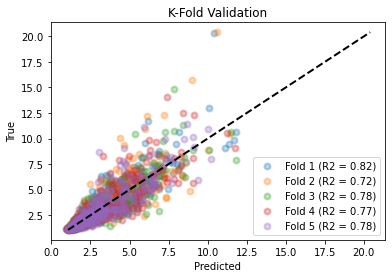

In [14]:
## call model
model = XGBRegressor()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [15]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

In [16]:

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

R2 (explained variance): 0.8
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.15
Mean Absolute Error (Σ|y-pred|/n): 0
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1
Max Error: 10


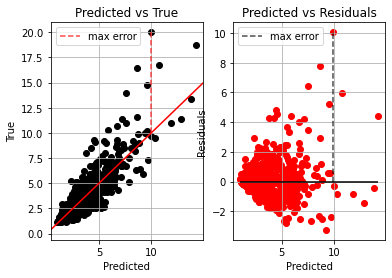

In [17]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()

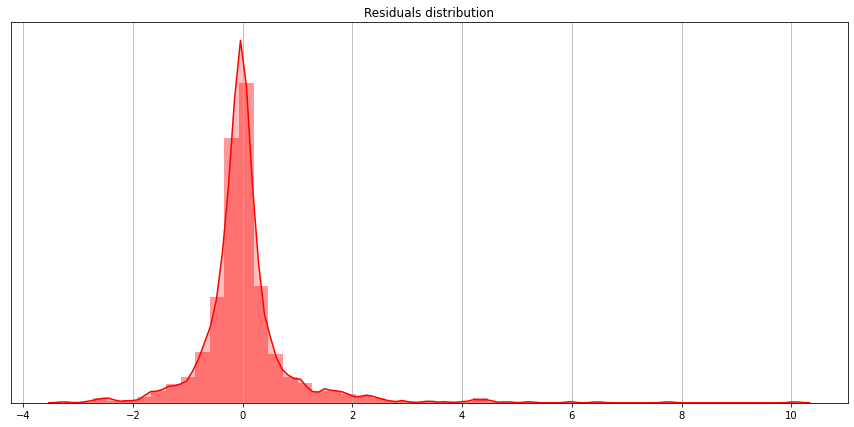

In [18]:
fig, ax = plt.subplots(figsize=[15,7])
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

In [22]:
dtf_test['predicted'] = predicted
dtf_test['Gain'] = np.where(dtf_test['FTR'] == 2, dtf_test['AvgHr'] - 1, -1)
dtf_test['aposta'] = np.where(dtf_test['AvgHr'] > dtf_test['predicted'], 1, 0)
db_test = dtf_test[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'AvgHr', 'predicted', 'Gain', 'aposta']].copy()
db_test_menor = db_test[db_test['aposta'] == 1]
db_test_maior = db_test[db_test['aposta'] == 0]
print(db_test_maior.head())
print(f'The gain was {sum(db_test_maior["Gain"]):.2f}')

Date   HomeTeam   AwayTeam  FTHG  FTAG  FTR  AvgHr  predicted  \
2897    23/01/16    Watford  Newcastle   2.0   1.0  2.0  2.070   2.122900   
811     03/05/08  Blackburn      Derby   3.0   1.0  2.0  1.266   1.452138   
3096    11/12/16    Chelsea  West Brom   1.0   0.0  2.0  1.278   1.308366   
4100  01/07/2020    Arsenal    Norwich   4.0   0.0  2.0  1.440   1.520425   
2697    04/04/15  West Brom        QPR   1.0   4.0  0.0  1.766   2.201806   

       Gain  aposta  
2897  1.070       0  
811   0.266       0  
3096  0.278       0  
4100  0.440       0  
2697 -1.000       0  
The gain was 51.93
